# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [4]:
df= pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [7]:
df[df['converted']==1].count()/ df['user_id'].count()

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

**f.** Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### Part 2
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

In [11]:
#df2= df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page') | df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]]

In [12]:
df_01 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_02 = df[(df.group == 'control') & (df.landing_page == 'old_page')] 
frames = [df_01, df_02]
df2 = pd.concat(frames)

In [13]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


### Remove duplicates 

**a.** How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.loc[df2['user_id'].duplicated(), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [16]:
df2.loc[df2['user_id'].duplicated(keep= False), :]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [17]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2['timestamp'].replace('2017-01-14 02:55:59.590927', '2017-01-09 05:37:58.781806', inplace = True)
# Check again if the row with a duplicate user_id is deleted or not


In [18]:
df2.drop_duplicates(inplace = True)

In [19]:
df2.loc[df2['user_id'].duplicated(), :]

,user_id,timestamp,group,landing_page,converted


In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


### Calculate the actual difference (obs_diff) between the conversion rates for the two groups. 
**a.**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [21]:
df2['converted'].value_counts()[1]/ df2['user_id'].count()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
p1=len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'control'])
p1

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
p2=len(df2[(df2['group']== 'treatment') & (df2['converted']==1)])/len(df2[df2['group']=='treatment'])
p2

0.11880806551510564

In [24]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= p2-p1
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [25]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

1. There is a slightly higher number of people that converted in the control group as opposed to the treatment group.
2. The percentage of converted in the control group is 12.038% and converted in the treatment group is 11.880%.
3. Not sure if there is a signifcant difference.

<a id='ab_test'></a>
## Part II - A/B Test

**$H_0$** :**$p_{new}$**<= **$p_{old}$**

**$H_1$**: **$p_{new}$**> **$p_{old}$**


Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 
- Use a sample size for each group equal to the ones in the `df2` data.
- Compute the difference in the "converted" probability for the two samples above. 
- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [15]:
p_new=len(df2[df2['converted']==1])/len(df2)
p_new

0.11959667567149027

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [16]:
p_old=len(df2[df2['converted']==1])/len(df2)
p_old

0.11959667567149027

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [17]:
n_new=len(df2[df2['group']== 'treatment'])
n_new

145311

**d.** What is $n_{old}$, the number of individuals in the control group?

In [18]:
n_old=len(df2[df2['group']== 'control'])
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [19]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1, 0], n_new, p = [p_new, 1-p_new])
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [20]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1, 0], n_old, p = [p_old, 1-p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [21]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013379239756912409


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [22]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    p_new1 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.
Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


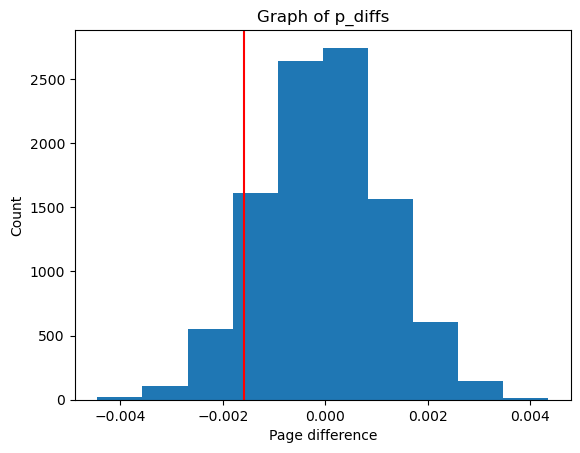

In [34]:
p_diffs=np.array(p_diffs)
#histogram of p_diff
plt.hist(p_diffs)
plt.title('Graph of p_diffs')
plt.xlabel('Page difference')
plt.ylabel('Count')
plt.axvline(x= obs_diff, color='r')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [35]:
var1 = df2[df2['landing_page'] == 'new_page']
var1=var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1-var2
actual_diff

-0.0015782389853555567

In [36]:
count = 0
for i in p_diffs:
    if i> actual_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.9014


1. We computed the actual difference versus observed difference in means of converted old page and converted new page.
2. This means that we had random choices of these mean converted values for the observed difference, which is stored in p_diffs.
3. The actual difference was calculated from the dataset ab_data.csv. This value that we calculated, difference in means, is the p-value.
4. Our p-value is exceeds the critical value of 0.05 in this case and hence we fail to reject the null hypothesis: we cannot conclude that the new page converts more users than the old page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [37]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])
print(convert_old)

# number of conversions with the new_page
convert_new = len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)])
print(convert_new)

# number of individuals who were shown the old_page
n_old = len(df2[df2['group']== 'control'])
print(n_old)

# number of individuals who received new_page
n_new = len(df2[df2['group']== 'treatment'])
print(n_old)

17489
17264
145274
145274


In [38]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
print(convert_old)

# number of conversions with the new_page
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])
print(convert_new)

# number of individuals who were shown the old_page
n_old = len(df2[df2['group']== 'control'])
print(n_old)

# number of individuals who received new_page
n_new = len(df2[df2['group']== 'treatment'])
print(n_old)

17489
17264
145274
145274


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 
---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

In [39]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='larger')
print(z_score, p_value)


1.3109241984234394 0.09494168724097551


In [40]:
from scipy.stats import norm
norm.cdf(z_score) # area under the curve left side

0.9050583127590245

In [41]:
1-0.9050583127590245 # p value for right tailed test

0.09494168724097551

In [42]:
norm.ppf(0.95) #critical value of 95% confidence

1.6448536269514722

1. The z-score of 1.311 is less than critical value at 95% confidence interval, 1.640, so it falls within the confidence interval range of 95%. We fail to reject the null hypothesis; the old page converted same or more users than the new page.
2. Old Page (17489/145274) is statistically different and slightly better than New Page (17264/145310). However, we would expect their long-term performance to be different from one another.These values agree with the findings in parts j. and k as the calculated values align with those obtained during the bootstrapped hypothesis testing done above.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Put your answer here.** Logistic regression


**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [43]:
df2['intercept'] = 1
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])
df2.drop('treatment', axis=1, inplace=True)
df2[df2['group']=='control']

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1
...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,1
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1


In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [45]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-03-16 11:07 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>**Put your answer here.**
1. The p-value associated with ab_page is 0.1899. This differs from the p-value in Part II because in Part II, H1 : $(p_{new} > p_{old})$. 
 was 
, so it uses a one-tailed p-value. 
2. On the other hand, the logistic regression model uses H0 that each coefficient is equal to 0. np.exp(0) equals 1, meaning 
 is that conversion is 1 times as likely when using the new page compared to the old page, or $(p_{new} = p_{old})$. 
. Therefore, 
 here is 
, so it uses a two-tailed p-value. Since the p-value is higher than the threshold of 0.05, we would fail to reject 
 and conclude that the new page is not a variable that affects conversion rates.
 
 
**$H_0$** :**$p_{new}$**- **$p_{old}$**=0

**$H_1$**: **$p_{new}$**-**$p_{old}$** !=0

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Put your answer here.**
1. It is a good to consider other factors to add into the regression model because there may be other variables besides group that correlate with whether people convert or not.
2. A disadvantage of adding additional terms into the regression model is that it may sometimes lead to multicollinearity. This is when two or more of the predictor variables are correlated with each other, and it can affect the model's coefficients.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.
 
     1. It does not appear that country has an impact on conversion, because compared to the baseline of UK, the p-values for the CA and US coefficients are both higher than the p-value threshold of .05. Additionally, we cannot conclude that there is an effect in choosing between CA and US because the 95% confidence intervals for these two coefficients overlap.

In [47]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
# Join with the df2 dataframe
new_df = df2.join(df3.set_index('user_id'), on='user_id')
new_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,CA


In [49]:
df2.shape

(290584, 7)

In [50]:
df3['user_id'].nunique()

290584

In [51]:
new_df['user_id'].nunique()

290584

In [52]:
new_df.shape

(290584, 8)

In [53]:
# Create the necessary dummy variables
new_df['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [54]:
new_df[['CA','UK', 'US']] =pd.get_dummies(new_df['country'])
new_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,CA,1,0,0


In [55]:
new_df.drop('UK', axis=1, inplace=True)
new_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,US,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,CA,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,UK,0,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,CA,1,0


In [56]:
new_df.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,1,US,0,1
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,US,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,US,0,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,US,0,1
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,US,0,1


In [61]:
# Fit your model, and summarize the results
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:               2.323e-05
Time:                        11:07:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9943      0.013   -156.012      0.000      -2.019      -1.969
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [62]:
np.exp(results.params)

intercept    0.136105
ab_page      1.015056
CA           0.950621
US           0.990165
dtype: float64

In [63]:
np.exp(0.0149),np.exp(-0.0506),np.exp(-0.0099)

(1.0150115583846535, 0.9506588580330708, 0.9901488436829572)

It does not appear that country has an impact on conversion, because compared to the baseline of UK, the p-values for the CA and US coefficients are both higher than the p-value threshold of .05. Additionally, we cannot conclude that there is an effect in choosing between CA and US because the 95% confidence intervals for these two coefficients overlap.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [64]:
new_df['ab_page_CA'] = new_df['ab_page']*new_df['CA']
new_df['ab_page_US'] = new_df['ab_page']*new_df['US']
new_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US,ab_page_CA,ab_page_US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,US,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,US,0,1,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,CA,1,0,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,UK,0,0,0,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,CA,1,0,0,0


In [65]:
# Fit your model, and summarize the results
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'CA', 'US', 'ab_page_CA', 'ab_page_US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:               3.482e-05
Time:                        11:08:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9814      0.016   -122.860      0.000      -2.013      -1.950
ab_page       -0.0108      0.023     -0.475      0.635      -0.056       0.034
CA            -0.0901      0.040     -2.225      0.026      -0.169      -0.011
US            -0.0257      0.019     -1.363      0.173      -0.063       0.011
ab_page_CA     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_US     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [66]:
np.exp(results.params)

intercept     0.137878
ab_page       0.989224
CA            0.913871
US            0.974672
ab_page_CA    1.081428
ab_page_US    1.031896
dtype: float64

>**Put your conclusion answer here.** 
 The country and page interaction does not have a significant effect on conversion because the p-values for all of the coefficients are higher than the p-value threshold of .05. Additionally, the 95% confidence intervals for CA and US overlap, and the 95% confidence intervals for ab_page_CA and ab_page_US overlap.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1